<a href="https://colab.research.google.com/github/nhuyen183/LungCancerSupportSystem/blob/master/BRFSS_LogisticRegression19Mar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Import Libraries { vertical-output: true, display-mode: "both" }

import sqlite3
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

!pip install category_encoders
from category_encoders import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 9.4 MB/s eta 0:00:00


In [108]:
#@title df_structure { display-mode: "both" }

from  glob import glob
filenames = glob('./*.csv')
appended_data = []  # create a list
for f in filenames:
  df = pd.read_csv(f, index_col=None)
  appended_data.append(df)  # append to the list
df_structure = pd.concat(appended_data, axis=0)
df_structure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155762 entries, 0 to 106523
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   Gender             1155762 non-null  int64
 1   Age65              1155762 non-null  int64
 2   BMI                1155762 non-null  int64
 3   GeneralHealth      1155762 non-null  int64
 4   CheckupFreq        1155762 non-null  int64
 5   Exercise           1155762 non-null  int64
 6   Smoked100          1155762 non-null  int64
 7   SmokerStatus       1155762 non-null  int64
 8   StopSmoking        1155762 non-null  int64
 9   TimeSinceQuitSmk   1155762 non-null  int64
 10  EverUsedEcig       1155762 non-null  int64
 11  EcigLevel          1155762 non-null  int64
 12  HasCTScan          1155762 non-null  int64
 13  HasChronicDisease  1155762 non-null  int64
 14  HasAsthma          1155762 non-null  int64
 15  HadStroke          1155762 non-null  int64
 16  HadHeartDisease    

In [109]:
df=df_structure

In [73]:
#@title df_structure { display-mode: "both" }

from  glob import glob
filenames_train = glob('./p*.csv')
appended_data = []  # create a list
for f in filenames_train:
  df = pd.read_csv(f, index_col=None)
  appended_data.append(df)  # append to the list
df_structure_train = pd.concat(appended_data, axis=0)
df_structure_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764463 entries, 0 to 106523
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Gender             764463 non-null  int64
 1   Age65              764463 non-null  int64
 2   BMI                764463 non-null  int64
 3   GeneralHealth      764463 non-null  int64
 4   CheckupFreq        764463 non-null  int64
 5   Exercise           764463 non-null  int64
 6   Smoked100          764463 non-null  int64
 7   SmokerStatus       764463 non-null  int64
 8   StopSmoking        764463 non-null  int64
 9   TimeSinceQuitSmk   764463 non-null  int64
 10  EverUsedEcig       764463 non-null  int64
 11  EcigLevel          764463 non-null  int64
 12  HasCTScan          764463 non-null  int64
 13  HasChronicDisease  764463 non-null  int64
 14  HasAsthma          764463 non-null  int64
 15  HadStroke          764463 non-null  int64
 16  HadHeartDisease    764463 non-null  in

In [74]:
df_train=df_structure_train

In [77]:
#@title df_structure { display-mode: "both" }

from  glob import glob
filenames_train = glob('./t*.csv')
appended_data = []  # create a list
for f in filenames_train:
  df = pd.read_csv(f, index_col=None)
  appended_data.append(df)  # append to the list
df_structure_test = pd.concat(appended_data, axis=0)
df_structure_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391299 entries, 0 to 104080
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Gender             391299 non-null  int64
 1   Age65              391299 non-null  int64
 2   BMI                391299 non-null  int64
 3   GeneralHealth      391299 non-null  int64
 4   CheckupFreq        391299 non-null  int64
 5   Exercise           391299 non-null  int64
 6   Smoked100          391299 non-null  int64
 7   SmokerStatus       391299 non-null  int64
 8   StopSmoking        391299 non-null  int64
 9   TimeSinceQuitSmk   391299 non-null  int64
 10  EverUsedEcig       391299 non-null  int64
 11  EcigLevel          391299 non-null  int64
 12  HasCTScan          391299 non-null  int64
 13  HasChronicDisease  391299 non-null  int64
 14  HasAsthma          391299 non-null  int64
 15  HadStroke          391299 non-null  int64
 16  HadHeartDisease    391299 non-null  in

In [78]:
df_test=df_structure_test

In [79]:
X_train = df_train.drop(columns='HasLungCancer')
y_train = df_train['HasLungCancer']
X_test = df_test.drop(columns='HasLungCancer')
y_test = df_test['HasLungCancer']


In [30]:
from google.colab import drive
drive.mount('drive', force_remount=True)

df.to_csv('/content/drive/My Drive/BRFSSdata.csv', encoding='utf-8', index=False)

Mounted at drive


In [29]:
#@title HasLungCancer { display-mode: "both" }
print (df["HasLungCancer"].value_counts())

0    1155034
1        728
Name: HasLungCancer, dtype: int64


In [27]:
#@title HasLungCancer { display-mode: "both" }
print (df["EverUsedEcig"].value_counts())

0    999398
1    156364
Name: EverUsedEcig, dtype: int64


In [28]:
#@title HasLungCancer { display-mode: "both" }
print (df["EcigLevel"].value_counts())

0    999714
3    124090
2     19431
1     12527
Name: EcigLevel, dtype: int64


In [ ]:
df.info()

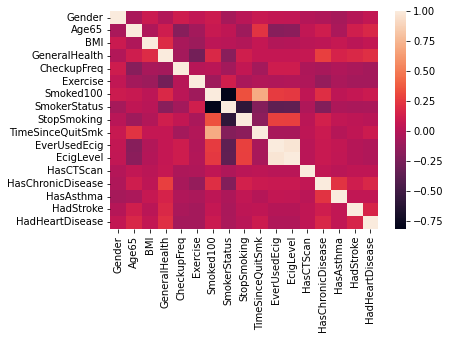

In [31]:
# Create correlation matrix
correlation = df.select_dtypes("number").drop(columns="HasLungCancer").corr()

# Plot heatmap of `correlation`
sns.heatmap(correlation);

In [96]:
X = df.drop(columns='HasLungCancer')
y = df['HasLungCancer']

In [35]:
majority_class_prop, minority_class_prop = y.value_counts(normalize=True)
print(majority_class_prop, minority_class_prop)

0.9993701125318188 0.0006298874681811654


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (809033, 17)
y_train shape: (809033,)
X_test shape: (346729, 17)
y_test shape: (346729,)


In [98]:
from imblearn.over_sampling import SMOTE
# transform the dataset
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [56]:
X_train['BMI'] = X_train['BMI'].astype("object")
X_train['GeneralHealth'] = X_train['GeneralHealth'].astype("object")
X_train['CheckupFreq'] = X_train['CheckupFreq'].astype("object")

X_train['SmokerStatus'] = X_train['SmokerStatus'].astype("object")
X_train['TimeSinceQuitSmk'] = X_train['TimeSinceQuitSmk'].astype("object")
X_train['EcigLevel'] = X_train['EcigLevel'].astype("object")

X_test['BMI'] = X_test['BMI'].astype("object")
X_test['GeneralHealth'] = X_test['GeneralHealth'].astype("object")
X_test['CheckupFreq'] = X_test['CheckupFreq'].astype("object")

X_test['SmokerStatus'] = X_test['SmokerStatus'].astype("object")
X_test['TimeSinceQuitSmk'] = X_test['TimeSinceQuitSmk'].astype("object")
X_test['EcigLevel'] = X_test['EcigLevel'].astype("object")

In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527756 entries, 0 to 1527755
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   Gender             1527756 non-null  int64
 1   Age65              1527756 non-null  int64
 2   BMI                1527756 non-null  int64
 3   GeneralHealth      1527756 non-null  int64
 4   CheckupFreq        1527756 non-null  int64
 5   Exercise           1527756 non-null  int64
 6   Smoked100          1527756 non-null  int64
 7   SmokerStatus       1527756 non-null  int64
 8   StopSmoking        1527756 non-null  int64
 9   TimeSinceQuitSmk   1527756 non-null  int64
 10  EverUsedEcig       1527756 non-null  int64
 11  EcigLevel          1527756 non-null  int64
 12  HasCTScan          1527756 non-null  int64
 13  HasChronicDisease  1527756 non-null  int64
 14  HasAsthma          1527756 non-null  int64
 15  HadStroke          1527756 non-null  int64
 16  HadHeartDisease   

In [82]:
# Build model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

classifier = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=2000))

# Fit model to training data
history = classifier.fit(X_train, y_train)
print(classifier)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression(max_iter=2000))])


In [83]:
#@title Evaluate the model { display-mode: "both" }
acc_train = accuracy_score(y_train, classifier.predict(X_train))
acc_test = classifier.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8028
Test Accuracy: 0.791


In [84]:
#acc_baseline = y_train.value_counts(normalize=True).max()
#print("Baseline Accuracy:", round(acc_baseline, 2))

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [85]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)
metrics = classification_report(y_test, y_pred)
print(metrics)
print(acc)

[[309393  81763]
 [    34    109]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88    391156
           1       0.00      0.76      0.00       143

    accuracy                           0.79    391299
   macro avg       0.50      0.78      0.44    391299
weighted avg       1.00      0.79      0.88    391299

0.7909603653472153


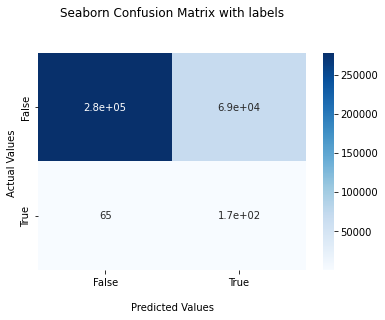

In [62]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [86]:
classifier.named_steps["logisticregression"].intercept_[0]

-0.603934021677633

In [87]:
classifier.named_steps["logisticregression"].coef_[0]

array([-0.70254792,  0.96739273, -1.3759595 ,  2.22584817, -3.34751662,
       -0.7521436 ,  1.10448339, -0.210652  , -0.27667831,  0.35868408,
       -1.02479247,  0.93942383, -1.60295962,  1.3547696 , -1.02072034,
       -1.57299907, -0.72078232])

In [ ]:
features = classifier.named_steps["minmaxscaler"].get_feature_names_out(['Gender','Age65','BMI','GeneralHealth','Smoked100','SmokerStatus','FirstSmokedAge','LastSmokedAge','AvgNumCigADay','HasCTScan','StopSmoking','HasAsthma','HasChronicDisease'])
importances = classifier.named_steps["logisticregression"].coef_[0]
print(features, importances)

In [ ]:
odds_ratios = pd.Series(np.exp(importances),index=features).sort_values()
odds_ratios

In [ ]:
# Horizontal bar chart, five largest coefficients
odds_ratios.plot(kind="barh")
plt.xlabel("Odds Ratio");

In [ ]:
def plotGraph(y_test,y_pred,classifier):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test)) 
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(classifier)
    plt.show()
    return

plotGraph(y_test, y_pred, "test")

In [100]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=12, input_dim=17, activation='relu'))
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the ANN

# Compiling the ANN
ann.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy', 'binary_crossentropy'])
print(ann.summary())

# Training the ANN on the Training set
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 100, epochs =10, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                216       
                                                                 
 dense_7 (Dense)             (None, 12)                156       
                                                                 
 dense_8 (Dense)             (None, 1)                 13        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
16171/16171 [==============================] - 27s 2ms/step - loss: 0.4128 - accuracy: 0.8107 - binary_crossentropy: 0.4128 - val_loss: 0.3928 - val_accuracy: 0.8103 - val_binary_crossentropy: 0.3928
Epoch 2/10
16171/16171 [==============================] - 25s 2ms/step - loss: 0.3811 - accuracy: 0.8293

In [101]:
# Predicting the Test set results
y_pred = ann.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

10836/10836 [==============================] - 10s 930us/step


In [102]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)
metrics = classification_report(y_test, y_pred)
print(metrics)
print(acc)

ValueError: ignored

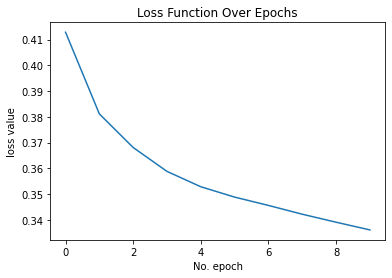

In [103]:
plt.plot(history.history['binary_crossentropy'])
plt.title('Loss Function Over Epochs')
plt.ylabel('loss value')
plt.xlabel('No. epoch')
plt.show()

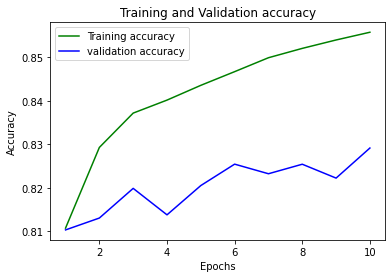

In [105]:
import matplotlib.pyplot as plt
loss_train = history.history['accuracy']

loss_val = history.history['val_accuracy']

epochs = range(1,11)

plt.plot(epochs, loss_train, 'g', label='Training accuracy')

plt.plot(epochs, loss_val, 'b', label='validation accuracy')

plt.title('Training and Validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

This chart shows the features that are least likely to be in a building that is severely damaged.

In [93]:
import matplotlib.pyplot as plt
loss_train = history.history['train_loss']

loss_val = history.history['val_loss']

epochs = range(1,35)

plt.plot(epochs, loss_train, 'g', label='Training loss')

plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

KeyError: ignored

In [ ]:
def buildModel(optimizer):
    # Initialising the ANN
    classifier = Sequential()
    
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 200, input_dim = 13, activation = 'relu'))
    
    # Adding the second hidden layer
    classifier.add(Dense(units = 100, activation = 'relu'))
    
    # Adding the output layer
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    # Compiling the ANN
    classifier.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['mean_absolute_error', 'binary_crossentropy'])
    
    return classifier

In [ ]:
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

classifier = KerasRegressor(build_fn = buildModel)
#What hyperparameter we want to play with
parameters = {'batch_size': [13, 26, 39, 50],
              'epochs': [40, 50],
              'optimizer': ['adam', 'binary_crossentropy']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5)
grid_search = grid_search.fit(X_train, y_train, verbose = 0)

In [ ]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: " + str(best_parameters))

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']

loss_val = history.history['val_loss']

epochs = range(1,51)

plt.plot(epochs, loss_train, 'g', label='Training loss')

plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

In [ ]:
loss_train = history.history['accuracy']

loss_val = history.history['val_accuracy']

epochs = range(1,51)

plt.plot(epochs, loss_train, 'g', label='Training accuracy')

plt.plot(epochs, loss_val, 'b', label='validation accuracy')

plt.title('Training and Validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

# 2. Decision Trees

## Build the Model

In [106]:
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils.validation import check_is_fitted

In [107]:
#@title Baseline Accuracy

"""
This is to calculate the baseline accuracy score for the model.

"""

acc_baseline = df["HasLungCancer"].value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 3))


Baseline Accuracy: 0.999


In [110]:
#@title Run the Model { display-mode: "both" }

# Build Model
model = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth=7, random_state=42))

# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=7, random_state=42))])

In [112]:
#@title Accuracy Score { display-mode: "both" }

#Calculate the training and validation accuracy scores for the models.

acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_test, 2))

Training Accuracy: 0.81
Validation Accuracy: 0.82


In [113]:
#@title Tree Depth { display-mode: "both" }

tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)


Tree Depth: 7


In [ ]:
#@title Hyperparameter Tuning { display-mode: "both" }
# Create a range of possible values for max_depth hyperparameter of the model's DecisionTreeClassifier.
depth_hyperparams = range(1,50,2)

# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
        MinMaxScaler(), 
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_test, y_test))

print("Training Accuracy Scores:", training_acc[:10])
print("Validation Accuracy Scores:", validation_acc[:10])


In [ ]:
#@title Plot of Accuracy Scores in a Validation Curve { display-mode: "both" }
"""

Create a visualization with two lines. The first line should plot the training_acc values as a function of depth_hyperparams, and the second should plot validation_acc as a function of depth_hyperparams. You x-axis should be labeled "Max Depth", and the y-axis "Accuracy Score". Also include a legend so that your audience can distinguish between the two lines.

"""

# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label="training")
plt.plot(depth_hyperparams, validation_acc, label="validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();



In [ ]:
test_acc = model.score(X_test, y_test)
print("Test Accuracy:", round(test_acc, 2))

In [ ]:
#@title Plot of Decision Tree { display-mode: "both" }

"""
Use the plot_tree function from scikit-learn 
to visualize the decision logic of the model.

"""

# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [ ]:
#@title Plot feature importances { display-mode: "both" }

"""

Assign the feature names and importances of your model to the variables below. 
For the features, you can get them from the column names in your training set. 
For the importances, you access the feature_importances_ attribute of your model's DecisionTreeClassifier.

"""

features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

feat_imp = pd.Series(importances, index=features).sort_values()

# Create horizontal bar chart
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature");

print(feat_imp.sum())

In [ ]:
#@title Top 10 Most Important Features { display-mode: "both" }
feat_imp.tail(10).sort_values(ascending=False)